# Get the data and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.tsa.stattools import adfuller

In [4]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File 'airline_passengers.csv' already there; not retrieving.

--2023-02-25 16:17:35--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: 'sp500sub.csv'

sp500sub.csv        100%[===================>]  24.29M  3.28MB/s    in 8.6s    

2023-02-25 16:17:45 (2.84 MB/s) - 'sp500sub.csv' saved [25473876/25473876]



# Airline Data

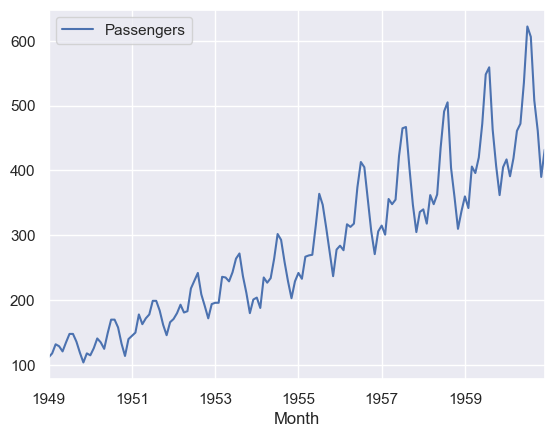

In [29]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.plot();

In [30]:
def adf(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] > 0.05:
        print('Cannot reject null hypothesis (non-stationary)')
    else:
        print('Reject null hypothesis (stationary)')

In [31]:
adf(np.random.randn(100))

ADF Statistic: -6.944482
p-value: 0.000000
Reject null hypothesis (stationary)


ADF Statistic: -30.275030
p-value: 0.000000
Reject null hypothesis (stationary)


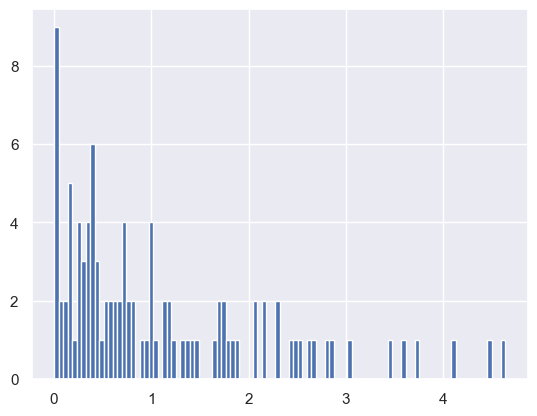

In [32]:
adf(np.random.gamma(1, 1, 1000))
plt.hist(np.random.gamma(1, 1, 100), bins=100);
# plt.figure()
# plt.plot(np.random.gamma(1, 1, 1000));

In [33]:
adf(df['Passengers'])

ADF Statistic: 0.815369
p-value: 0.991880
Cannot reject null hypothesis (non-stationary)


In [34]:
df['LogPassengers'] = np.log(df['Passengers'])
adf(df['LogPassengers'])

ADF Statistic: -1.717017
p-value: 0.422367
Cannot reject null hypothesis (non-stationary)


ADF Statistic: -2.829267
p-value: 0.054213
Cannot reject null hypothesis (non-stationary)


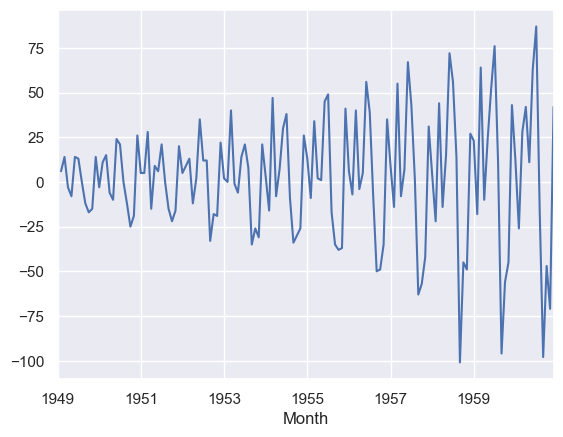

In [35]:
df['Diff'] = df['Passengers'].diff()
adf(df['Diff'].dropna())
df['Diff'].plot();

ADF Statistic: -2.717131
p-value: 0.071121
Cannot reject null hypothesis (non-stationary)


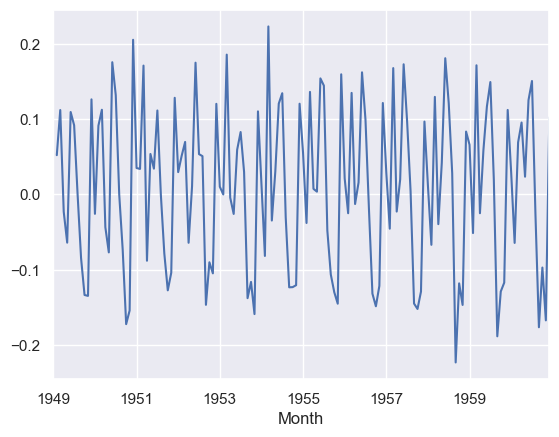

In [36]:
df['DiffLog'] = df['LogPassengers'].diff()
adf(df['DiffLog'].dropna())
df['DiffLog'].plot();

# Stocks Data

In [38]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [39]:
goog = df[df['Name']=='GOOG'][['Close']]

In [40]:
goog['LogPrice'] = np.log(goog['Close'])
goog['Diff'] = goog['Close'].diff()
goog['DiffLog'] = goog['LogPrice'].diff()

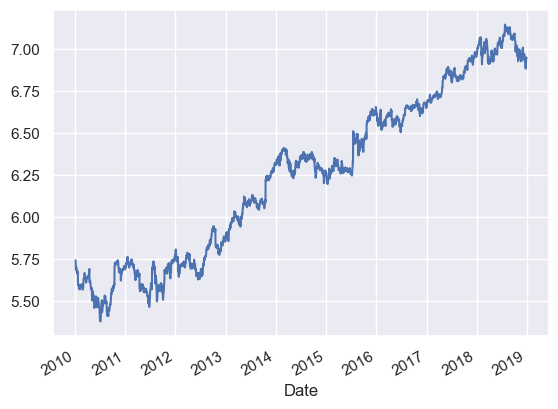

In [41]:
goog['LogPrice'].plot();

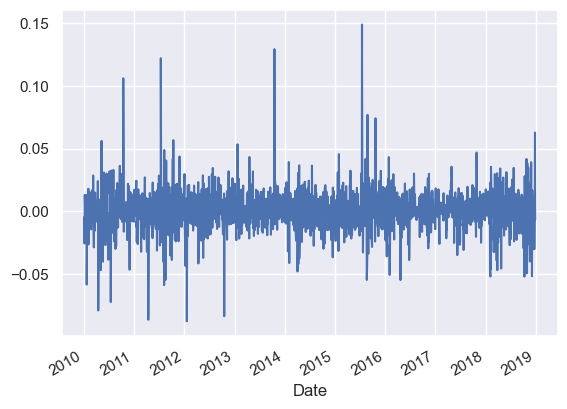

In [43]:
goog['DiffLog'].plot();

In [44]:
adf(goog['LogPrice'].dropna())

ADF Statistic: -0.418190
p-value: 0.907017
Cannot reject null hypothesis (non-stationary)


In [45]:
adf(goog['DiffLog'].dropna())

ADF Statistic: -46.667480
p-value: 0.000000
Reject null hypothesis (stationary)


In [46]:
sbux = df[df['Name']=='SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['Diff'] = sbux['Close'].diff()
sbux['DiffLog'] = sbux['LogPrice'].diff()

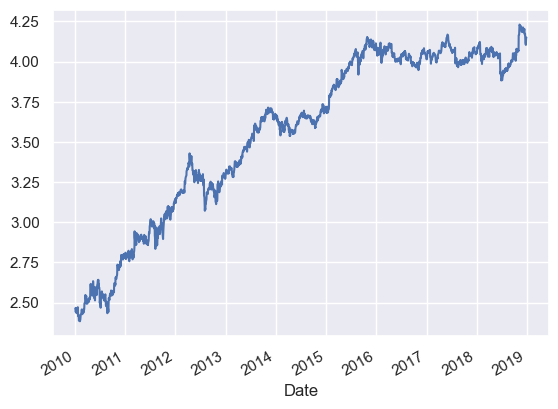

In [47]:
sbux['LogPrice'].plot();

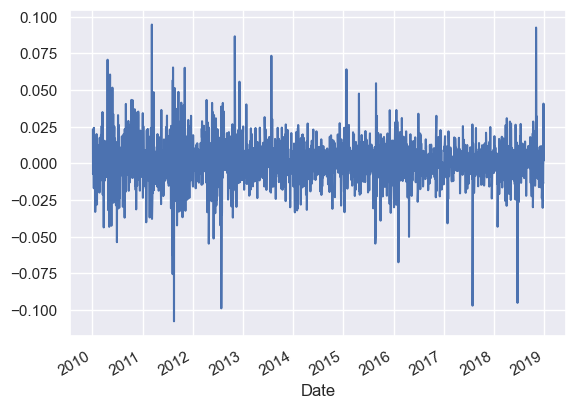

In [48]:
sbux['DiffLog'].plot();

In [49]:
adf(sbux['LogPrice'].dropna())

ADF Statistic: -1.902013
p-value: 0.331115
Cannot reject null hypothesis (non-stationary)


In [50]:
adf(sbux['DiffLog'].dropna())

ADF Statistic: -30.086501
p-value: 0.000000
Reject null hypothesis (stationary)
